SIN-392 - Introdução ao Processamento Digital de Imagens (2022-1)

# Aula 11 - Morfologia Matemática I

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bibliotecas-necessárias" data-toc-modified-id="Importando-as-bibliotecas-necessárias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bibliotecas necessárias</a></span></li><li><span><a href="#Criando-uma-imagem-binária-simples" data-toc-modified-id="Criando-uma-imagem-binária-simples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Criando uma imagem binária simples</a></span></li><li><span><a href="#Carrega-uma-imagem-real-(binária)" data-toc-modified-id="Carrega-uma-imagem-real-(binária)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Carrega uma imagem real (binária)</a></span><ul class="toc-item"><li><span><a href="#Plotando-a-imagem" data-toc-modified-id="Plotando-a-imagem-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plotando a imagem</a></span></li></ul></li><li><span><a href="#Elementos-estruturantes" data-toc-modified-id="Elementos-estruturantes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Elementos estruturantes</a></span><ul class="toc-item"><li><span><a href="#Plotando-os-elementos-estruturantes" data-toc-modified-id="Plotando-os-elementos-estruturantes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plotando os elementos estruturantes</a></span></li><li><span><a href="#Selecionando-o-elemento-estruturante" data-toc-modified-id="Selecionando-o-elemento-estruturante-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Selecionando o elemento estruturante</a></span></li><li><span><a href="#Aplicando-operações-de-morfologia-matemática" data-toc-modified-id="Aplicando-operações-de-morfologia-matemática-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Aplicando operações de morfologia matemática</a></span></li><li><span><a href="#Plotando-as-imagens" data-toc-modified-id="Plotando-as-imagens-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Plotando as imagens</a></span></li></ul></li><li><span><a href="#Bibliografia" data-toc-modified-id="Bibliografia-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bibliografia</a></span></li></ul></div>

## Importando as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np

from skimage import img_as_float, filters, morphology, data
import matplotlib.pyplot as plt

## Criando uma imagem binária simples

In [2]:
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Carrega uma imagem real (binária)

* Descomentar este trecho para usar a imagem real.
* Comentar para usar a imagem simples

In [3]:
# img = ~data.horse()

# print(img.dtype, img.min(), img.max())

### Plotando a imagem

<IPython.core.display.Javascript object>


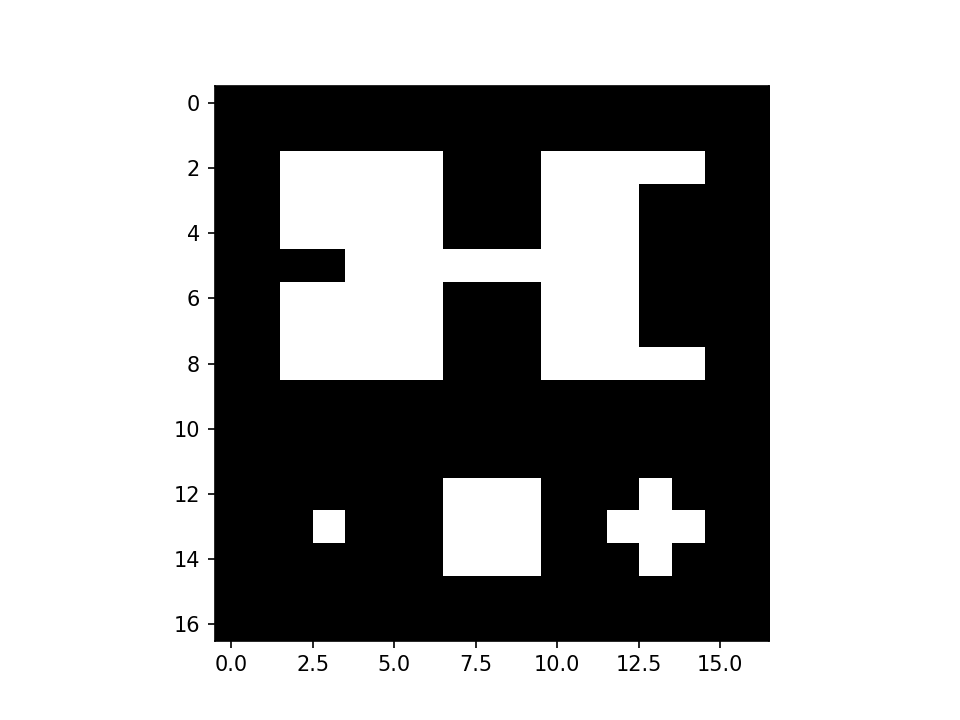

In [4]:
plt.figure()
plt.imshow(img, cmap='gray', interpolation='nearest')

plt.show()

## Elementos estruturantes

In [5]:
# Elemento estruturante (cruz 3x3)
ee1 = np.array([[0,1,0],
                [1,1,1],
                [0,1,0]])

# Elemento estruturante (quadrado 3x3)
ee2 = np.ones([3,3])

# Elemento estruturante (retangular 5x1)
ee3 = np.ones([5,1])

# Elemento estruturante irregular
ee4 = np.array([[1,1,1],
                [0,0,1],
                [1,1,0]])

# Elemento estruturante (quadrado 45x45)
ee5 = morphology.disk(5)

### Plotando os elementos estruturantes

<IPython.core.display.Javascript object>


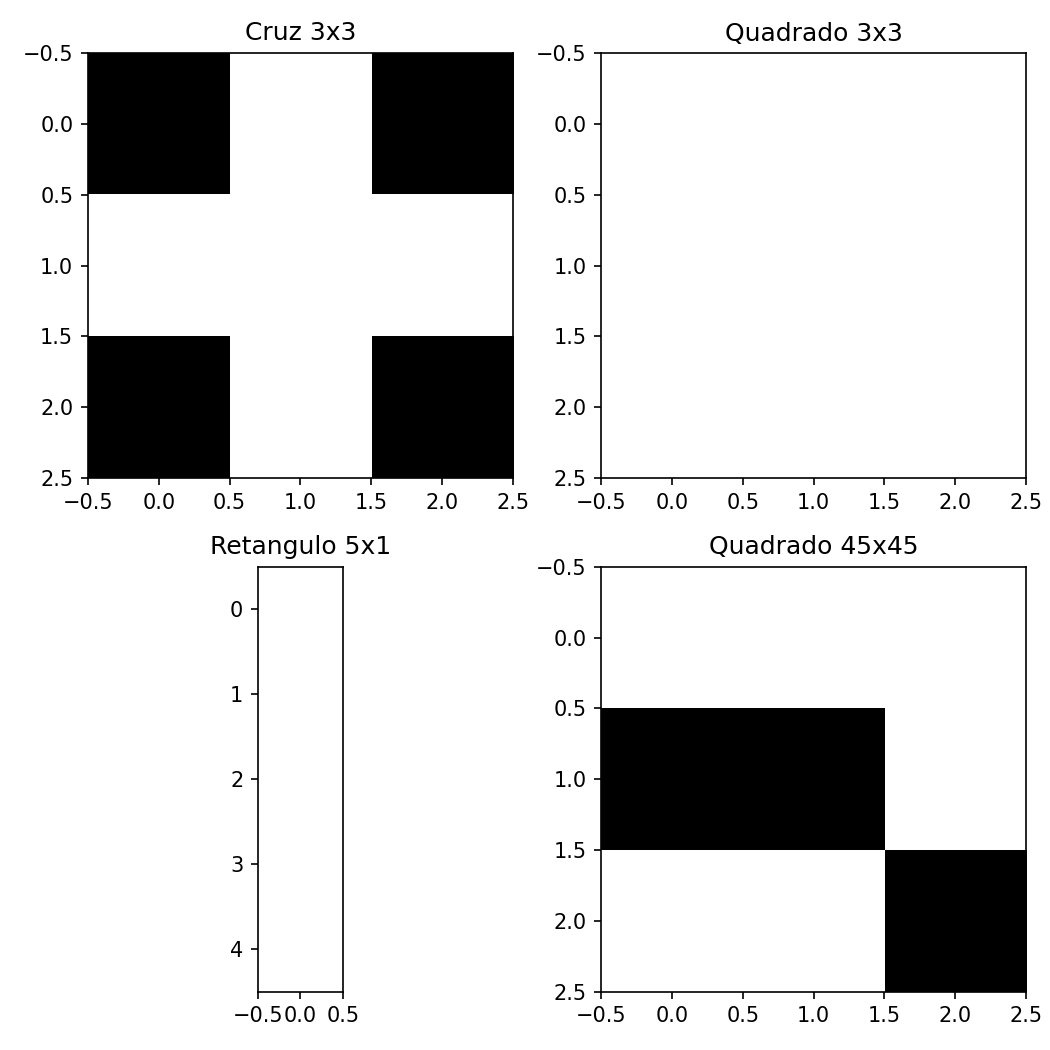

In [6]:
# Plota imagens
plt.figure(figsize=(7,7))

plt.subplot(221)
plt.imshow(ee1, cmap='gray', interpolation='nearest')
plt.title('Cruz 3x3')
plt.subplot(222)
plt.imshow(ee2, cmap='gray', vmin=0, vmax=1, interpolation='nearest')
plt.title('Quadrado 3x3')
plt.subplot(223)
plt.imshow(ee3, cmap='gray', vmin=0, vmax=1,interpolation='nearest')
plt.title('Retangulo 5x1')
plt.subplot(224)
plt.imshow(ee4, cmap='gray', vmin=0, vmax=1,interpolation='nearest')
plt.title('Quadrado 45x45')

plt.tight_layout()
plt.show()

### Selecionando o elemento estruturante

In [7]:
ee = ee2

# *** Descomentara quando usar a imagem real
#ee = ee5

### Aplicando operações de morfologia matemática

In [8]:
# Dilatacao
im_dil1 = morphology.binary_dilation(img, ee)

# Erosao
im_ero1 = morphology.binary_erosion(img, ee)

# Abertura
im_abe = morphology.binary_opening(img, ee)

# Fechamento
im_fec = morphology.binary_closing(img, ee)

### Plotando as imagens

<IPython.core.display.Javascript object>


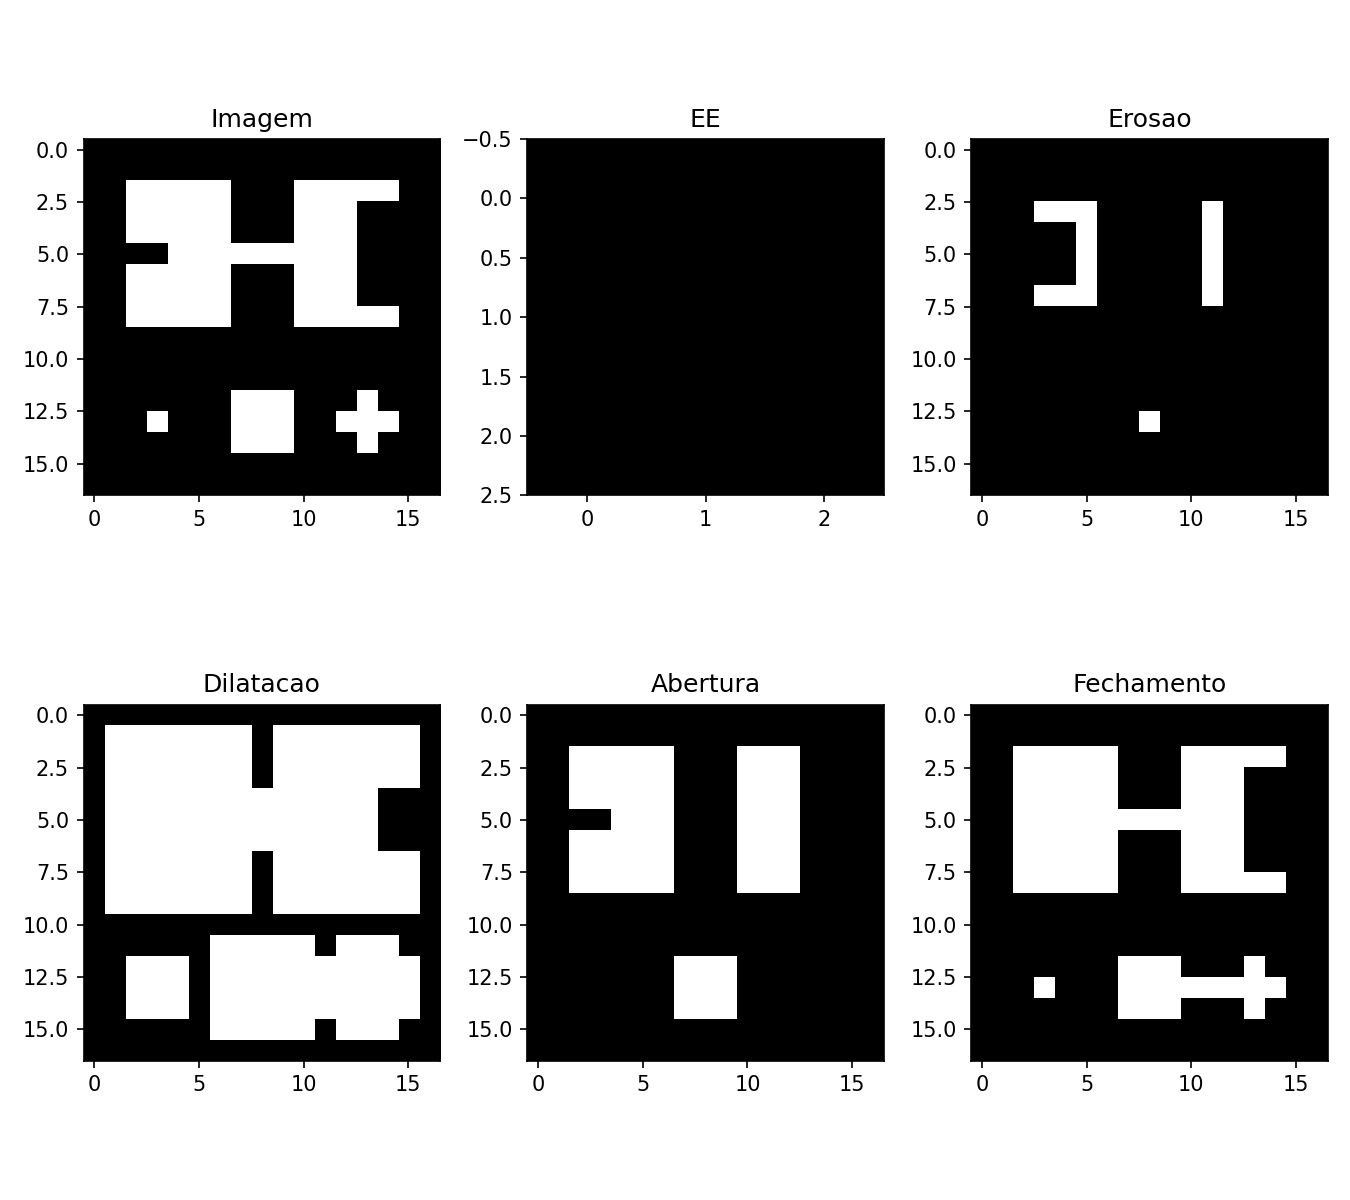

In [9]:
# Plota imagens
plt.figure(figsize=(9, 8))
plt.subplot(231)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.title('Imagem')
plt.subplot(232)
plt.imshow(ee, cmap='gray', interpolation='nearest')
plt.title('EE')
plt.subplot(233)
plt.imshow(im_ero1, cmap='gray', interpolation='nearest')
plt.title('Erosao')
plt.subplot(234)
plt.imshow(im_dil1, cmap='gray', interpolation='nearest')
plt.title('Dilatacao')
plt.subplot(235)
plt.imshow(im_abe, cmap='gray', interpolation='nearest')
plt.title('Abertura')
plt.subplot(236)
plt.imshow(im_fec, cmap='gray', interpolation='nearest')
plt.title('Fechamento')

plt.tight_layout()
plt.show()

## Bibliografia

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * Disponível para download no site do autor (Exclusivo para uso pessoal)
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

* GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

* Prof. Aldo von Wangenheim. Morfologia Matemática
    * http://www.inf.ufsc.br/~visao/morfologia.pdf

* Prof. James Facon. A Morfologia Matemática e suas Aplicações em Processamento de Imagens - Minicurso – WVC 2011
    * http://www.ppgia.pucpr.br/~facon/Books/2011WVCMinicurso2Morfo.pdf 

* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
    
* The USC-SIPI Image Database.    
    * http://sipi.usc.edu/database/database.php
    
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * Disponível em: http://scipy-lectures.org/

* scikit-image. Documentação.
    * https://scikit-image.org/docs/dev/index.html

* scikit-image. Documentação. Módulo 'morphology'. 
    * https://scikit-image.org/docs/dev/api/skimage.morphology.html
    
* Morphological Filtering 
    * https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html
    
* NumPy. Documentação.
    * https://numpy.org/doc/stable/